In [28]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
basetree = Tree(fc.passthrough.NMSSM_MX_600_MY_400)
basetree = EventFilter('all sixb',nfound_presel=6).filter(basetree)

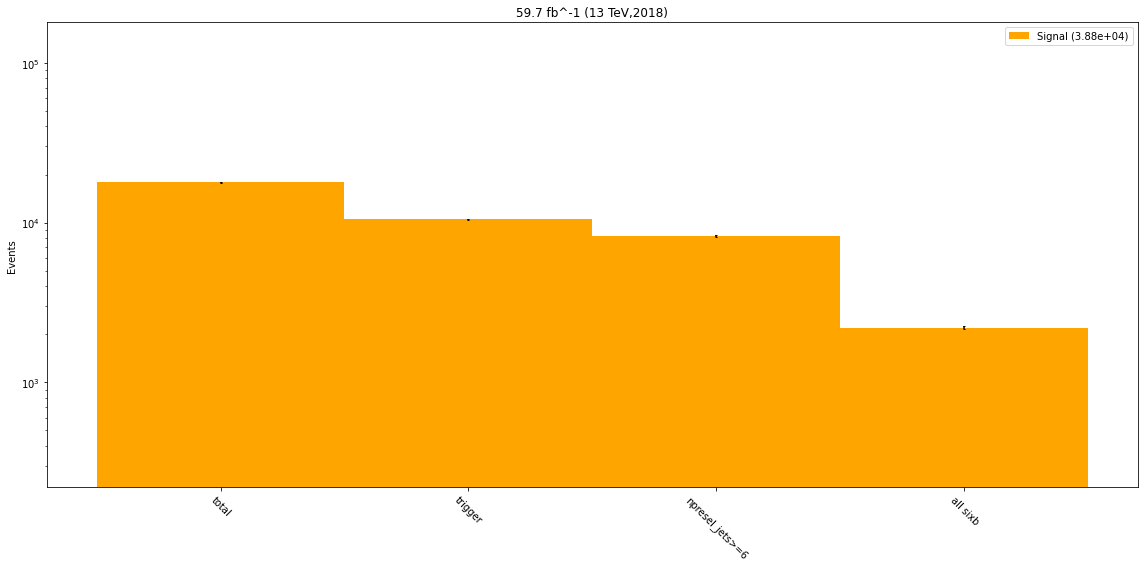

In [30]:
study.cutflow([basetree])

In [31]:
sixbtree = CollectionFilter('jet',signalId_neq=-1).filter(basetree)
top6bias = CollectionFilter('jet',index_max=6).filter(basetree)
top6pt = CollectionFilter('jet',index_max=6).filter( basetree.reorder_collection('jet',ak.argsort(-basetree.jet_pt,axis=-1)) )
top6btag = CollectionFilter('jet',index_max=6).filter( basetree.reorder_collection('jet',ak.argsort(-basetree.jet_btag,axis=-1)) )

In [32]:
sixbtree.sample = "Six B"
top6bias.sample = "T6 Pt Bias"
top6pt.sample = "T6 Pt"
top6btag.sample = "T6 Btag"

treeiter = TreeIter([sixbtree,top6bias])
for tree in treeiter: tree.color = None


In [33]:
treeiter.extend(kwargs=lambda tree : dict(
    nsixb_jets = ak.sum(tree.jet_signalId>-1,axis=-1)
))

[None, None]

In [34]:
varinfo.nsixb_jets = dict(xlabel='N Signal Jets',bins=range(8))

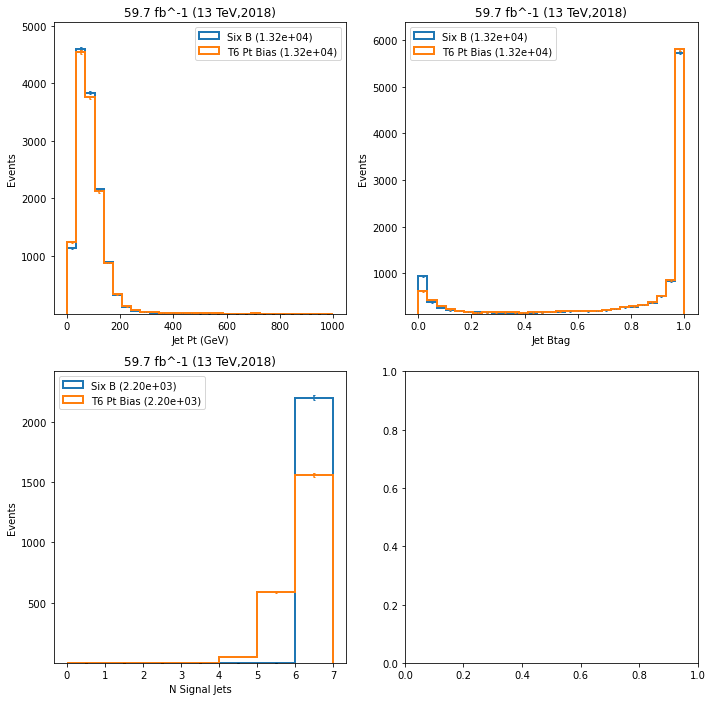

In [35]:
study.quick(treeiter,varlist=['jet_pt','jet_btag','nsixb_jets'],ratio=0)